In [30]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, GlobalAveragePooling2D, MaxPooling2D, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.optimizers import AdamW

In [31]:
root_dir = r"/kaggle/input/cats-and-dogs/cats_and_dogs_filtered"

In [32]:
BATCH_SIZE  = 32
EPOCHS = 50
input_img_size = (128,128)
input_shape = (128,128,3)

In [33]:
# 1. Define ONE generator with augmentation and the validation split
tf_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    rescale=1/255.0,
    shear_range=0.2,        
    zoom_range=0.2,
    validation_split=0.2,
    fill_mode='nearest',
    rotation_range=20
)

In [34]:
# 2. Create the training data flow from the generator
train_data = tf_generator.flow_from_directory(
    "/kaggle/input/cats-and-dogs/cats_and_dogs_filtered/train",
    target_size=input_img_size,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='training',  # Specify this is the training set
    shuffle=True
)

# 3. Create the validation data flow from the SAME generator
val_data = tf_generator.flow_from_directory(
    "/kaggle/input/cats-and-dogs/cats_and_dogs_filtered/train",
    target_size=input_img_size,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='validation', # Specify this is the validation set
    shuffle=False # No need to shuffle validation data
)

Found 2202 images belonging to 2 classes.
Found 550 images belonging to 2 classes.


In [39]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Dense,Flatten,MaxPooling2D

model = Sequential([
    # First Convolutional Block
    Conv2D(32, (3, 3), activation="relu", input_shape=input_shape),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    # Second Convolutional Block
    Conv2D(64, (3, 3), activation="relu"),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    # Third Convolutional Layer (added for more depth)
    Conv2D(128, (3, 3), activation="relu"),
    BatchNormalization(),

    # Flattening and Dense Layers
    Flatten(),
    Dense(256, activation="relu"),
    BatchNormalization(),
    Dropout(0.5), # Higher dropout rate for dense layers is common
    
    # Output Layer
    Dense(2, activation='softmax')
])

In [40]:
optimizer = AdamW(learning_rate=1e-4, weight_decay=1e-5)
model.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [41]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_16          │ (None, 126, 126, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_17          │ (None, 61, 61, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_18          │ (None, 28, 28, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 100352)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 256)            │    25,690,368 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_19          │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 2)              │           514 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,786,050 (98.37 MB)

 Trainable params: 25,785,090 (98.36 MB)

 Non-trainable params: 960 (3.75 KB)

In [42]:
history = model.fit(train_ds,epochs=EPOCHS, validation_data=val_ds,verbose=1)

Epoch 1/50


I0000 00:00:1754822928.062120    1858 service.cc:148] XLA service 0x7f2cbc006cf0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1754822928.062198    1858 service.cc:156]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1754822928.551138    1858 cuda_dnn.cc:529] Loaded cuDNN version 90300


 1/86 ━━━━━━━━━━━━━━━━━━━━ 13:59 10s/step - accuracy: 0.3438 - loss: 1.1379

I0000 00:00:1754822933.195328    1858 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


86/86 ━━━━━━━━━━━━━━━━━━━━ 27s 206ms/step - accuracy: 0.5619 - loss: 1.0674 - val_accuracy: 0.5403 - val_loss: 0.7151
Epoch 2/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 16s 181ms/step - accuracy: 0.6296 - loss: 0.8087 - val_accuracy: 0.5403 - val_loss: 0.8982
Epoch 3/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 15s 179ms/step - accuracy: 0.6328 - loss: 0.7888 - val_accuracy: 0.5403 - val_loss: 1.0898
Epoch 4/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 16s 186ms/step - accuracy: 0.6238 - loss: 0.8052 - val_accuracy: 0.5565 - val_loss: 0.7265
Epoch 5/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 16s 184ms/step - accuracy: 0.6397 - loss: 0.7631 - val_accuracy: 0.5565 - val_loss: 0.9114
Epoch 6/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 16s 181ms/step - accuracy: 0.6803 - loss: 0.7117 - val_accuracy: 0.5605 - val_loss: 1.1602
Epoch 7/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 16s 185ms/step - accuracy: 0.6953 - loss: 0.6838 - val_accuracy: 0.6089 - val_loss: 0.8119
Epoch 8/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 16s 188ms/step - accuracy: 0.6803 - loss: 0.6933 - val_accuracy: 0.596

In [43]:
loss, accuracy = model.evaluate(val_ds)
print(f"Validation Loss: {loss:.4f}")
print(f"Validation Accuracy: {accuracy:.4f}")

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 159ms/step - accuracy: 0.7103 - loss: 0.9673
Validation Loss: 0.9751
Validation Accuracy: 0.6976


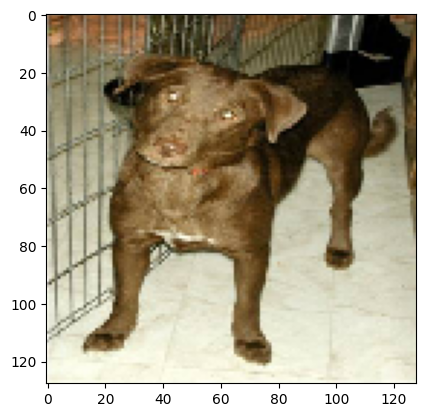

In [44]:
from tensorflow.keras.preprocessing import image
import numpy as np

img_path = r"/kaggle/input/cats-and-dogs/cats_and_dogs_filtered/train/dogs/dog.1.jpg"

img = image.load_img(img_path, target_size=input_img_size)
img_array = image.img_to_array(img)  # shape: (_, _, 3)
img_array = img_array / 255.0        # normalize

img_array = np.expand_dims(img_array, axis=0)  # shape: (1, _, _, 3)
plt.imshow(img_array[0])  # Display the image

In [45]:
class_indices = train_data.class_indices  # dict: {class_name: class_index}
print("Class names found:", class_indices)

Class names found: {'cats': 0, 'dogs': 1}


In [46]:
model.predict(img_array)[0][0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 825ms/step


0.70169604

In [47]:
prediction = model.predict(img_array)[0][0]
class_name = "dogs" if prediction > 0.5 else "cats"

print(f"Predicted class: {class_name} with confidence {prediction:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Predicted class: dogs with confidence 0.70


# Model Saving

In [48]:
model.save('ML044_Phoe_Kitt.h5')